# Spring 2023 ME395: Deep Learning Discrete Calculus (DLDC) for Engineering Applications
# Lecture 3.2 Interpolation 2

Instructors: \
> Prof. Wing Kam Liu, w-liu@northwestern.edu \

Guest lecturers: \
> Prof.Mark Fleming \
> Dr. Abdullah Al Amin \

> 
Graders: \
> Sourav Saha \
> Jiachen Guo \
> Chanwook Park, chanwookpark2024@u.northwestern.edu \

## Super resolution image
### Let's improve the resolution of an image

Saving Kellogg.jpg to Kellogg.jpg
(573, 860)


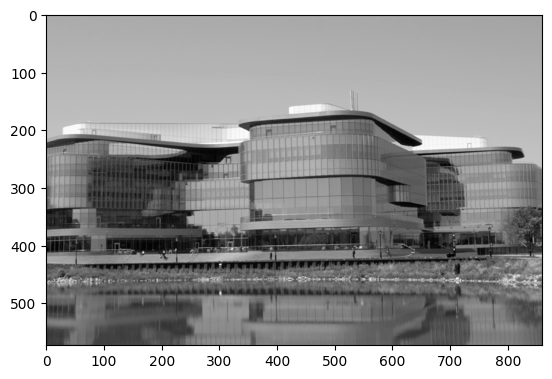

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# # Use this line when uploading image files
uploaded = files.upload() 

file = cv2.imread('/content/Kellogg.jpg')
image_org = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY) # Gray scale read
plt.imshow(image_org, cmap='gray')
print(image_org.shape)




(144, 215)


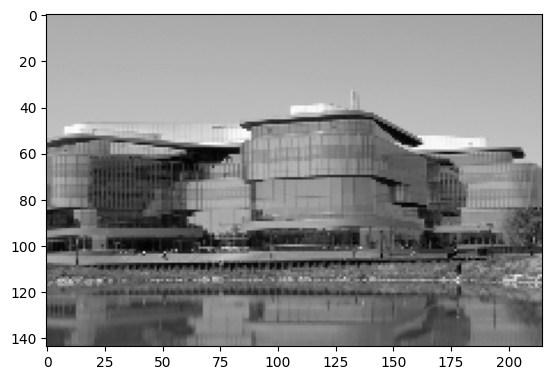

In [ ]:
# Downsample the image
image_LR = image_org[0::4, 0::4]
print(image_LR.shape)
plt.imshow(image_LR, cmap='gray')

In [ ]:
print(image_LR[60:65,100:105])

[[169 155 163 176 143]
 [167 154 163 177 140]
 [160 153 150 152 137]
 [147 150 145 151 137]
 [160 154 169 176 158]]


[[177. 177. 177. ... 169. 170. 170.]
 [173. 173. 174. ... 166. 166. 166.]
 [169. 170. 170. ... 163. 162. 162.]
 ...
 [ 58.  60.  62. ... 100. 102. 104.]
 [ 59.  60.  62. ... 102. 104. 105.]
 [ 60.  60.  61. ... 105. 106. 106.]]
(287, 429)


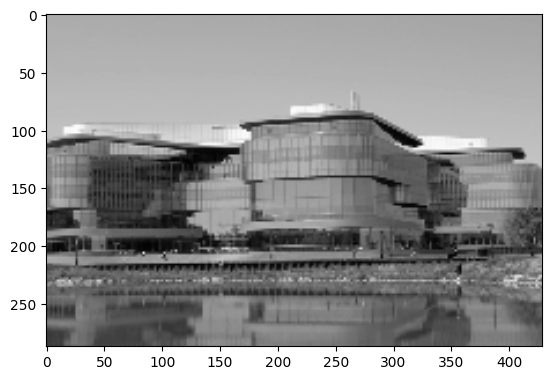

In [ ]:
# First super resolution

row_LR, col_LR = image_LR.shape
image_HR = np.zeros((2*row_LR-1, 2*col_LR-1))
image_HR[0::2, 0::2] = image_LR

f_N = np.array([[0.5, 0.5],
                [0.0, 0.0]]) # filter north
f_W = np.array([[0.5, 0.0],
                [0.5, 0.0]]) # filter west
f_S = np.array([[0.0, 0.0],
                [0.5, 0.5]]) # filter south
f_E = np.array([[0.0, 0.5],
                [0.0, 0.5]]) # filter east
f_C = np.array([[0.25, 0.25],
                [0.25, 0.25]]) # filter center

for row in range(row_LR-1):
  for col in range(col_LR-1):
    pixel = image_LR[row:row+2, col:col+2]
    image_HR[2*row, 2*col+1] = round(np.sum(pixel * f_N))
    image_HR[2*row+1, 2*col] = round(np.sum(pixel * f_W))
    image_HR[2*row+1, 2*col+2] = round(np.sum(pixel * f_E))
    image_HR[2*row+2, 2*col+1] = round(np.sum(pixel * f_S))
    image_HR[2*row+1, 2*col+1] = round(np.sum(pixel * f_C))

print(image_HR)
print(image_HR.shape)
plt.imshow(image_HR, cmap='gray')